# Data Exploration

## Introduction

After we collect our data and before we start our analysis, it is important that we understand what is in our data sets. The process of exploratory data analysis helps us do that. Exploratory data analysis, or often referred to as EDA, aims to uncover any trends in the data, discover outliers, and reveal relationships between variables. Its goal is to get a look at the underlying structure of the data set, screen the data to identify any obvious errors or outliers, understand patterns within the data, detect outliers, and prompt us to ask questions and check and validate our assumptions. All of these smaller goals can be summed up by the overarching goal of enhacing our understanding of our data and giving us insights into what exists within our data sets. 

<p align="left">
    <img src="eda.png" height=225, width=433, alt="Your Image" style="float:right; margin-left:15px;" />
</p>

There are many different technqiues for data exploration, but the main two categories that these methods fall into are graphical and non-graphical. Graphical EDA includes producing visualizations to visually represent what is in the data set. Graphs such as box plots, histograms, scatterplots, stem-and-leaf plots, parallel coordinate plots, etc, are common and very useful for graphical EDA. Non-graphical EDA often includes clustering and dimensionality reduction techniques, as well as summary statistics. I will get into clustering and dimension reduction later in this website so I will not address that now, but summary statistics are very useful for figuring out what the important numerical variables are within the data. 

When we dig a little further into EDA, we also can further subdivide into univariate and multivariate EDA. Univariate EDA is quite simple, as you are only focusing on one variable. Non-graphical univariate EDA includes describing that one variable and finding any patterns within it. Graphical univariate EDA helps to provide all the context that the non-graphical methods lack. This can be done through graphs mentioned above.

Multivariate EDA is a little more complex but provides us with more information. Non-graphical multivariate EDA methods can show relationships within the data through cross-correlation statistics. Graphical multivariate EDA methods use similar graphs to univariate EDA, but also includes multivariate charts such as heatmaps, bubble charts, and other multivariate charts. 

Finally, the last data exploration method worth touching on is Confirmatory Data Analysis, or CDA. CDA is the opposite of EDA as it is guided by a specific hypothesis or theories using collected data. It takes a deductive approach and is driven by analysis and a pre-defined theory or model. Researchers will often design their experiences or data collection processes with these pre-defined theories in mind. CDA relies heavily on statistical methods to assess the validity of the hypothesis. There is a greater emphasis on validity and reliability in CDA than in EDA as CDA aims to provide evidence that supports or contradicts the proposed hypothesis. 

I chose to use EDA methods instead of CDA methods because of how many unknowns come with sports data and the options for moving forward that EDA would give me. Using EDA instead of CDA allowed me to simply learn about the different relationships within the data and choose the path that will provide the most valuable insights into what will keep athletes safe. 

## Record Data

The main methods that I use for doing exploratory data analysis of my record data are graphical methods. I utilize bar charts, pie charts, scatterplots, confusion matricies, and more. I use the packages Pandas, Matplotlib, Numpy, etc, to so do.

### Injury Prevention Factors 

When it came to the injury prevention factors data, I wanted to explore more into each athlete's personal statistics (height, weight, age), as well as further into the injury prevention and injury risk factors. I first started by taking all the numerical columns and finding summary statistics. Then, for all the binary labels, I wanted to see what athletes had previous injuries, risk factors, and what prevention measures they were taking, so I made a series of bar charts to further explore those variables. 


In [1]:
#| code-fold: true
import pandas as pd
file_path = "../../../../data/01-modified-data/injury_prevention_data_soccer.csv"

injury_prevention = pd.read_csv(file_path)
injury_prevention["Height"] = injury_prevention["Height"].astype(int)
injury_prevention["Mass"] = injury_prevention["Mass"].astype(int)

numerical_columns = injury_prevention.select_dtypes(include='int64')
numerical_columns = injury_prevention.drop(columns="ID")
numerical_columns.describe()


,Age,Height,Mass,Team,Position,Years of Football Experience,Number of Injuries,Number of Ankle Injuries,Number of Knee Injuries,Number of Thigh Injuries,Importance Injury Prevention,Knowledgeability
count,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000
mean,17.597122,177.043165,68.417266,3.690647,2.546763,1.733813,1.906475,0.683453,0.517986,0.726619,1.345324,0.827338
std,4.601070,9.416198,11.781156,1.825142,0.853153,0.913470,1.614661,0.932784,0.684746,0.778383,0.586221,0.415777
min,13.000000,141.000000,31.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,14.000000,172.500000,61.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,16.000000,178.000000,70.000000,4.000000,3.000000,2.000000,2.000000,0.000000,0.000000,1.000000,1.000000,1.000000
75%,19.000000,184.000000,76.000000,5.500000,3.000000,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000
max,35.000000,196.000000,101.000000,6.000000,4.000000,4.000000,10.000000,4.000000,3.000000,3.000000,4.000000,2.000000


/Users/reneedemaio/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/reneedemaio/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/reneedemaio/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/reneedemaio/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstan

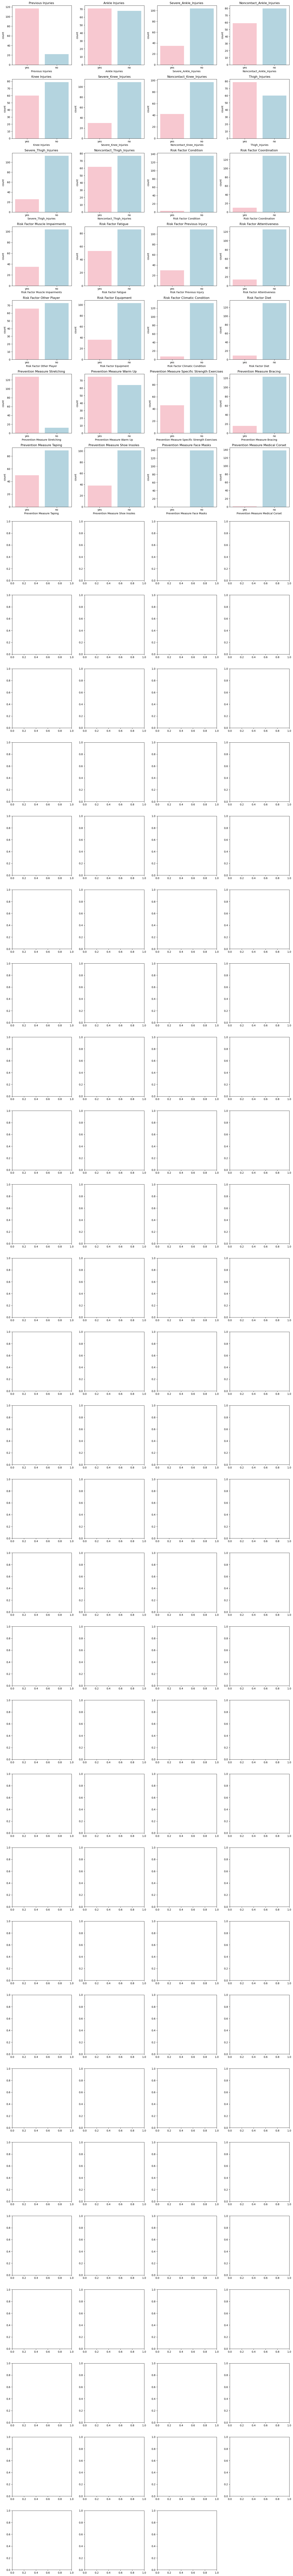

In [4]:
#| code-fold: true
import matplotlib.pyplot as plt
import seaborn as sns

object_columns = injury_prevention.select_dtypes(include='object')
num_rows = (len(object_columns) + 3) // 4
fig, axes = plt.subplots(num_rows, 4, figsize=(16, num_rows * 4))
axes = axes.flatten()

for i, column in enumerate(object_columns):
    ax = axes[i]
    sns.countplot(data=injury_prevention, x=column, order=['yes', 'no'], palette=['pink', 'lightblue'], ax=ax)
    ax.set_title(f'{column}')

for j in range(len(object_columns), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

### Injuries from Different Activities

This data set compares injuries by age group in different activities. I wanted to see how different age groups compare between activities so I made a bar chart comparing all age groups for each activity to see which one prompted the most injuries. Some things to note about this graph and data set are (1) that the activites that have the least amount of injuries are activites that aren't necessarily accessible for everyone, such as skiing and water skiing. Weather or condition depending sports (such as sports requiring water or snow) are only accessible to people who live in places with those resources. And (2) that the age groups aren't particularly even. The 24-65 age group is disproportionally bigger than the other age groups which can lead to unclear or unrealiable analysis.

/Users/reneedemaio/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/reneedemaio/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/reneedemaio/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/reneedemaio/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstan

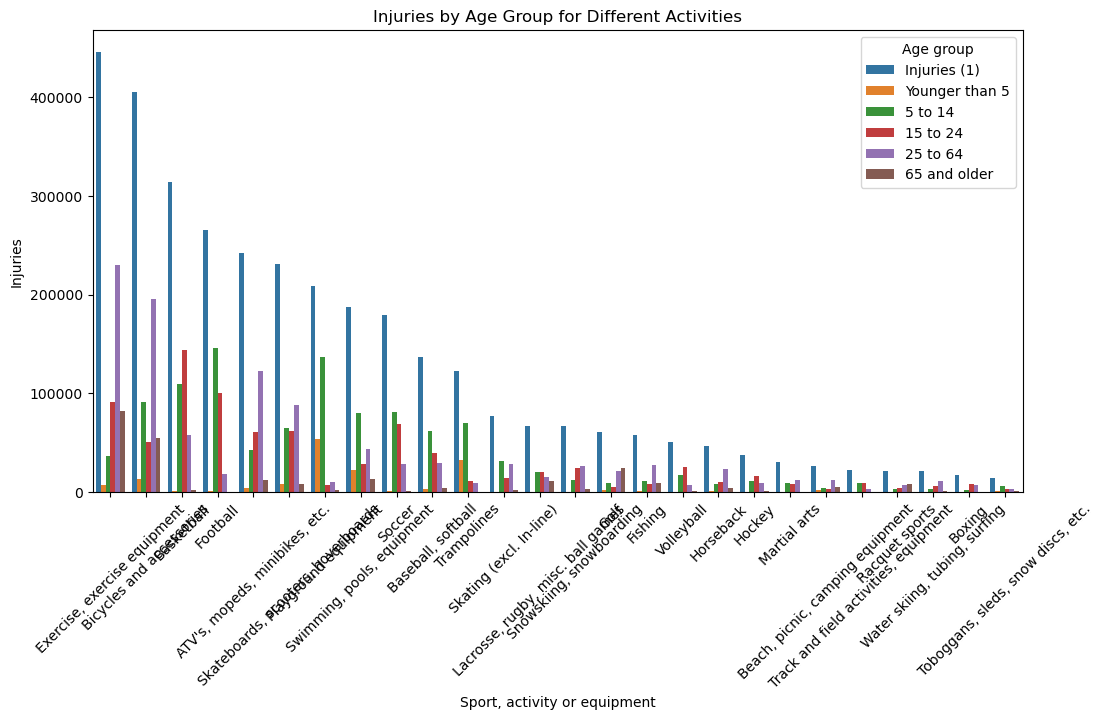

In [8]:
#| code-fold: true 

file_path = "../../../../data/01-modified-data/sports_injury_data.csv"
sports_injuries = pd.read_csv(file_path)
ic_subset = sports_injuries[['Injuries (1)', 'Younger than 5',
       '5 to 14', '15 to 24', '25 to 64', '65 and older']]
activity_type = sports_injuries["Sport, activity or equipment"]

sports_injuries["Injuries (1)"] = sports_injuries["Injuries (1)"].str.replace(',', '').astype(float)
sports_injuries["Younger than 5"] = sports_injuries["Younger than 5"].str.replace(',', '').astype(float)
sports_injuries["5 to 14"] = sports_injuries["5 to 14"].str.replace(',', '').astype(float)
sports_injuries["15 to 24"] = sports_injuries["15 to 24"].str.replace(',', '').astype(float)
sports_injuries["25 to 64"] = sports_injuries["25 to 64"].str.replace(',', '').astype(float)
sports_injuries["65 and older"] = sports_injuries["65 and older"].str.replace(',', '').astype(float)

melted_df = pd.melt(sports_injuries, id_vars=['Sport, activity or equipment'], var_name='Age group', value_name='Injuries')
plt.figure(figsize=(12, 6))
sns.barplot(data=melted_df, x='Sport, activity or equipment', y='Injuries', hue='Age group')
plt.title('Injuries by Age Group for Different Activities')
plt.xlabel('Sport, activity or equipment')
plt.xticks(rotation=45)
plt.show()

### NBA Injury Data

The NBA injury data is interesting as it includes information about not only the type of injury but also the team, which allows us to explore any correlations between the two teams. 

In [14]:
#| code-fold: true
import pandas as pd 
import numpy as np
import gdown

# the csv url is: https://drive.google.com/file/d/1tdKeSFi492daHWh8Laqb7e3_68o3kaqD/view?usp=share_link
file_id = "1tdKeSFi492daHWh8Laqb7e3_68o3kaqD"
url = f"https://drive.google.com/uc?id={file_id}"
output = "basketball_injuries.csv"
#gdown.download(url, output, quiet=False)

file_path = "../../../../data/01-modified-data/basketball_injury_data.csv"

bball_injury_data = pd.read_csv(file_path)

Downloading...
From: https://drive.google.com/uc?id=1tdKeSFi492daHWh8Laqb7e3_68o3kaqD
To: /Users/reneedemaio/Desktop/real git_repo/dsan-5000-project-rennyd123/dsan-website/5000-website/tabs/eda/basketball_injuries.csv
100%|██████████| 1.57M/1.57M [00:00<00:00, 2.00MB/s]


#### Injury Status Bar Chart

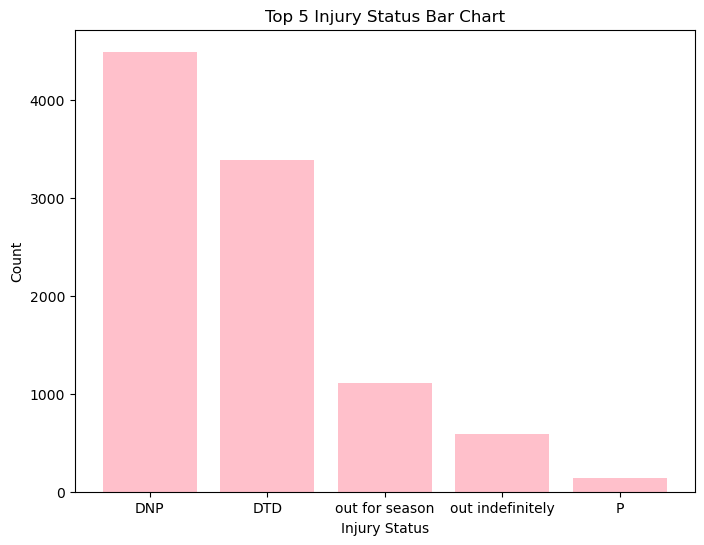

In [28]:
#| code-fold: true
import matplotlib.pyplot as plt

injury_counts = bball_injury_data["InjuryStatus"].value_counts()

top_5_injury_counts = injury_counts.head(5)

plt.figure(figsize=(8, 6))
plt.bar(top_5_injury_counts.index, top_5_injury_counts.values, color='pink')
plt.xlabel('Injury Status')
plt.ylabel('Count')
plt.title('Top 5 Injury Status Bar Chart')

plt.show()

#### Injuries Per Team 

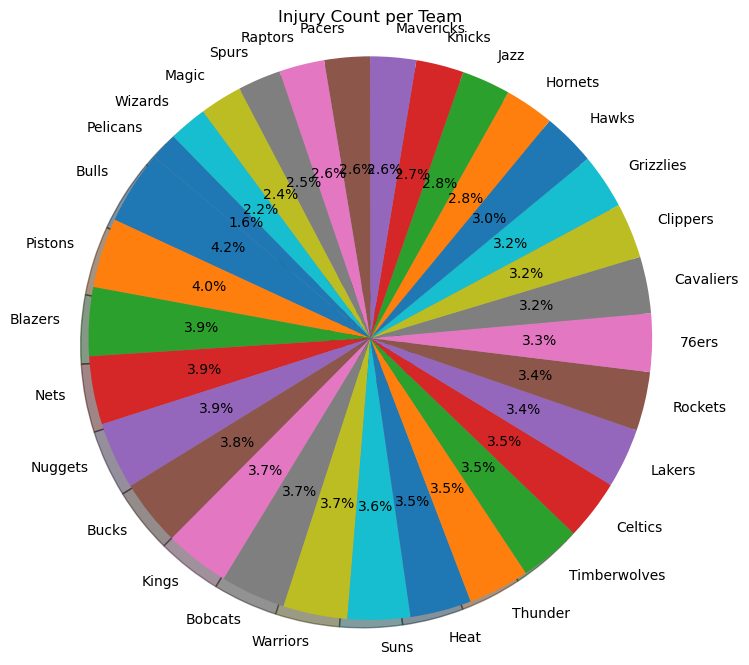

In [32]:
#| code-fold: true
team_counts = bball_injury_data["Team"].value_counts()
team_names = bball_injury_data["Team"].unique()

plt.figure(figsize=(8, 8))
plt.pie(team_counts, labels=team_names, autopct='%1.1f%%', startangle=140, shadow=True)
plt.axis("equal")
plt.title("Injury Count per Team")
plt.show()


#### Injuries by Dates

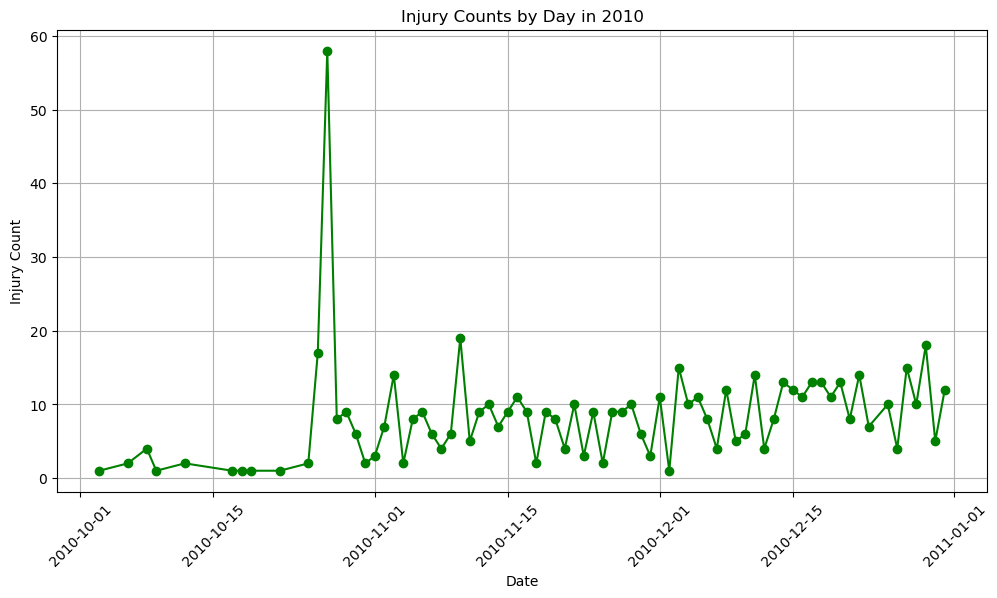

In [37]:
#| code-fold: true
bball_injury_data['Date'] = pd.to_datetime(bball_injury_data['Date'])
date_counts_2010 = bball_injury_data[bball_injury_data['Date'].dt.year == 2010]
date_counts_2010 = date_counts_2010['Date'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.plot(date_counts_2010.index, date_counts_2010.values, marker='o', linestyle='-', color="green")
plt.xlabel("Date")
plt.ylabel("Injury Count")
plt.title("Injury Counts by Day in 2010")
plt.xticks(rotation=45)

plt.grid(True)
plt.show()

The first graph created for this data set reveals that the most common reason given for an athlete’s absence from an NBA game is simply that they did not play. This can be for any variety of reasons from personal reasons, issues with the coach, or injury as well. The next most common is did not dress, which could imply that the athlete is injuries, but doesn’t specifically state that. The next graph shows that most teams in the NBA had relatively similar rates of injury with most of the hovering around 3%. Finally, the last graph shows one interesting spike in injuries in late October of 2010. There is nothing notable in NBA history that day that would cause so many more athletes to be out, so this can be considered an outlier. Outside of that, the average number of injuries across all teams per day hovers between 0-15.

### NFL Concussion Data 

This NFL concussion data set has a lot of information about specific instances of head injuries as it provides the game the injury occured in, what kind of head injury it was, the playing time before and after the injury, how many weeks were missed, etc. This prompted me to wonder about which teams experience the most head injuries, as well if there is any correlation between the week of the injury and playing time after the injury.

#### Injury Count by Team 

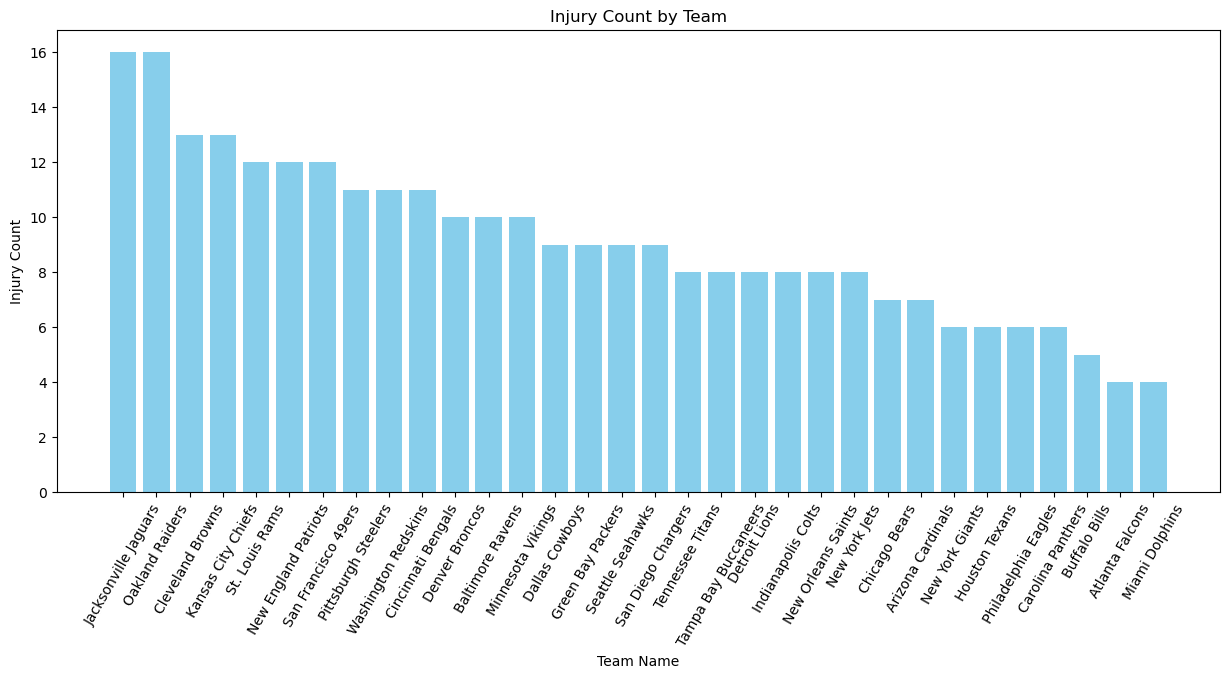

In [15]:
#| code-fold: true
file_path = "../../../../data/01-modified-data/nfl_concussions.csv"

concussion_data = pd.read_csv(file_path)
injuries_by_team = concussion_data['Team'].value_counts()
 
plt.figure(figsize=(15, 6))
plt.bar(injuries_by_team.index, injuries_by_team.values, color="skyblue")
plt.xlabel("Team Name")
plt.ylabel("Injury Count")
plt.title("Injury Count by Team")
plt.xticks(rotation=60)

plt.show()

#### Type of Injury

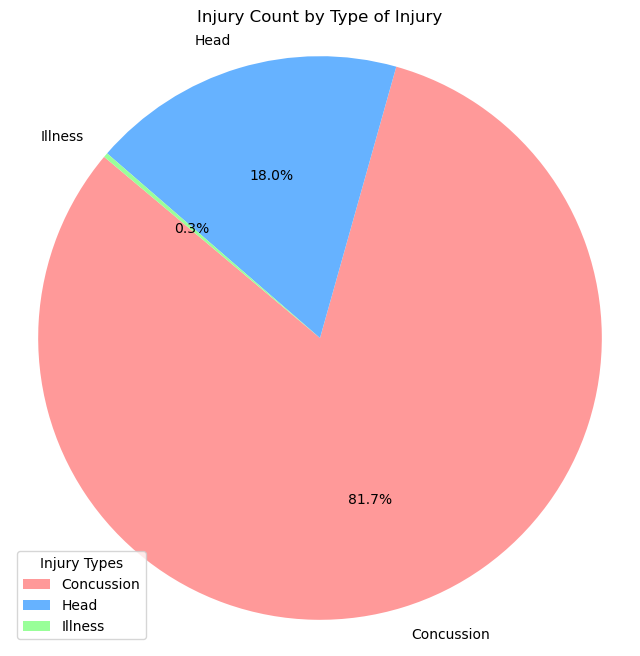

In [6]:
#| code-fold: true
injury_type = concussion_data["Reported Injury Type"].value_counts()
injury_name = injury_type.index

pastel_colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#c2c2f0', '#ffb3e6', '#c2f0c2']

plt.figure(figsize=(8, 8))
plt.pie(injury_type, labels=injury_name, autopct='%1.1f%%', startangle=140, shadow=False, colors=pastel_colors)
plt.axis("equal")
plt.title("Injury Count by Type of Injury")
plt.legend(injury_name, title="Injury Types", loc="best")
plt.show()

#### Injuries by Position

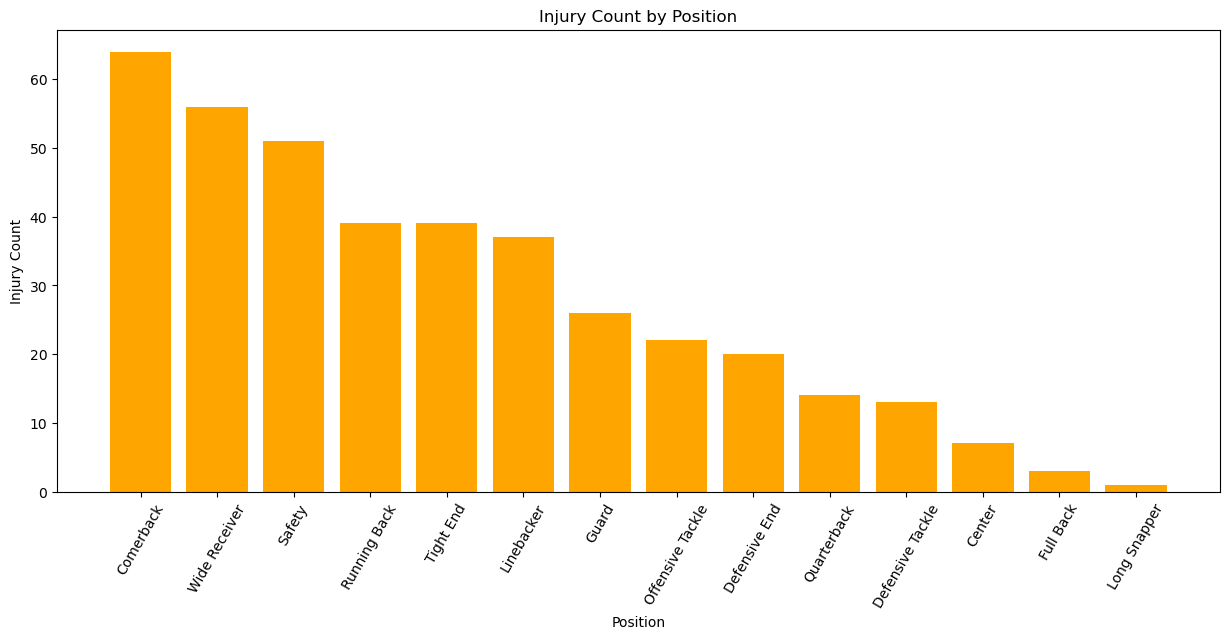

In [49]:
#| code-fold: true
injuries_by_pos = concussion_data['Position'].value_counts()
 
plt.figure(figsize=(15, 6))
plt.bar(injuries_by_pos.index, injuries_by_pos.values, color="orange")
plt.xlabel("Position")
plt.ylabel("Injury Count")
plt.title("Injury Count by Position")
plt.xticks(rotation=60)

plt.show()

#### Correlation Between Week of Injury and Total Snaps

/var/folders/kw/p7j6fdpx3vvgm6c0krhwpvb80000gn/T/ipykernel_14289/2432288225.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  concussion_data_subset["Play Time After Injury (Number)"] = pd.to_numeric(


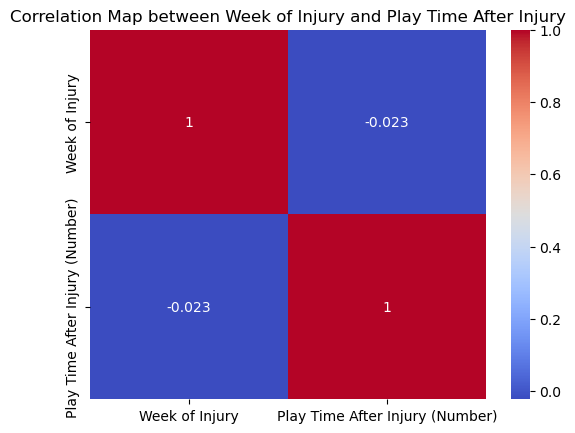

In [17]:
#| code-fold: true
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

concussion_data[["Play Time After Injury (Number)", "Play Time After Injury"]] = \
    concussion_data["Play Time After Injury"].str.split(" ", expand=True)

subset = ["Week of Injury", "Play Time After Injury (Number)"]
concussion_data_subset = concussion_data[subset]

concussion_data_subset["Play Time After Injury (Number)"] = pd.to_numeric(
    concussion_data_subset["Play Time After Injury (Number)"], errors="coerce"
)

corr_matrix = concussion_data_subset.corr()

sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Map between Week of Injury and Play Time After Injury")
plt.show()

The graphs made from the NFL concussion data reveal that the Cincinatti Bengals and the Cleveland Browns had the most concussions on their team. The majority of head injuries are concussions (81.7%), but there are also a fair share of non-concussion head injuries (18.0%). It appears that the illness category (0.3%) can be taken as an outlier and can be disgarded because the data set is only intended to focus on head injuries. Next, the position that sees the most amount of concussion injuries is cornerback, closely followed by wide receiver and safety. Finally, there was a small negative correlation between week of injury and play time after injury, meaning that if a player got injured at a later week, they tended to not play very much afterwards, implying that they either got injured too late in the season or that their injury was severe. 

### NFL Game Injury Data

The NFL game injury data set includes more information about the conditions in which the injury occured in, such as what the weather was like, what the field conditions and set up were, and of course information about the injury as well, such as what type of injury it was. 

##### Injury Count by Stadium Type

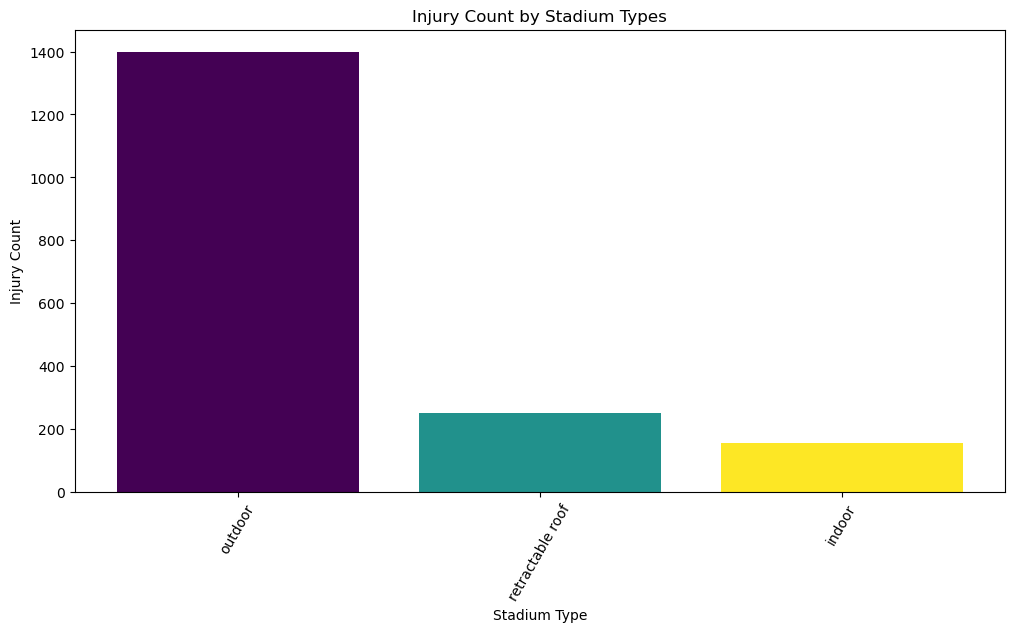

In [65]:
#| code-fold: true

file_path = "../../../../data/01-modified-data/nfl_injuries.csv"
nfl_injuries = pd.read_csv(file_path)

stadium_type = nfl_injuries["StadiumType"].value_counts()
colors = plt.cm.viridis(np.linspace(0, 1, len(stadium_type)))


plt.figure(figsize=(12,6))
plt.bar(stadium_type.index, stadium_type.values, color=colors)
plt.xlabel("Stadium Type")
plt.ylabel("Injury Count")
plt.title("Injury Count by Stadium Types")
plt.xticks(rotation = 60)
plt.show()

##### Injury Count by Body Part Injured

BodyPart
Knee     825
Ankle    720
Toes     144
Foot      96
Heel      18
Name: count, dtype: int64


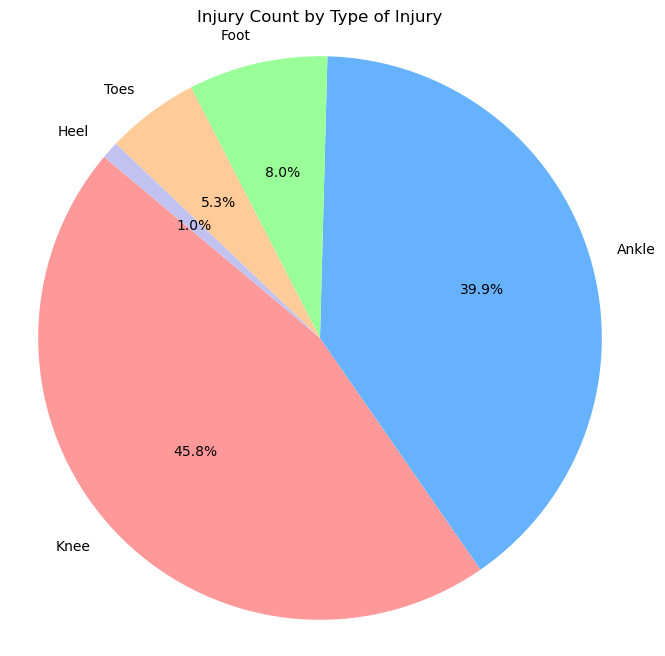

In [82]:
#| code-fold: true
import seaborn as sns

injury_frequency = nfl_injuries["BodyPart"].value_counts()
injury_place = nfl_injuries["BodyPart"].unique()
print(injury_frequency)

pastel_colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#c2c2f0', '#ffb3e6', '#c2f0c2']

plt.figure(figsize=(8, 8))
plt.pie(injury_frequency, labels=injury_place, autopct='%1.1f%%', startangle=140, shadow=False, colors=pastel_colors)
plt.axis("equal")
plt.title("Injury Count by Type of Injury")
plt.show()

##### Injury Count vs Temperature

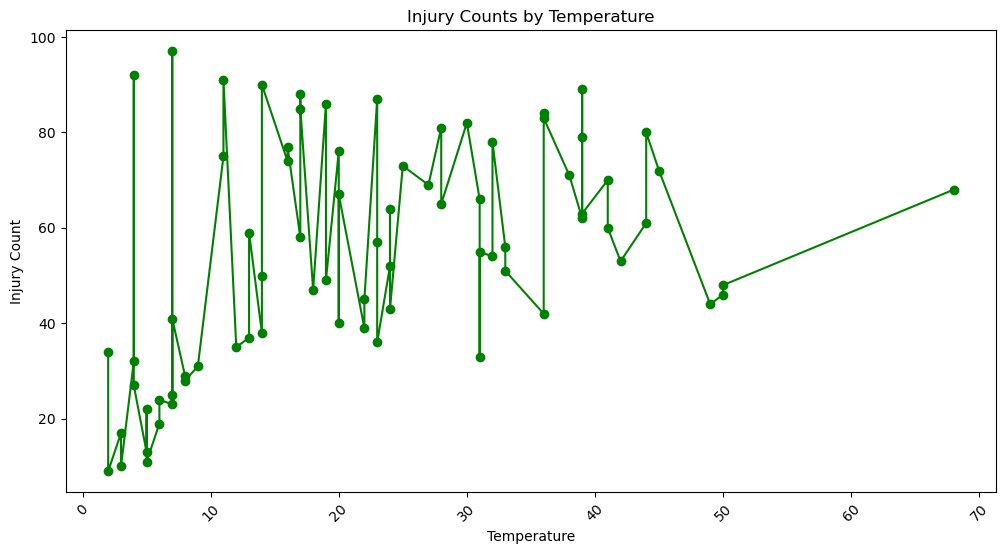

In [89]:
#| code-fold: true
nfl_injuries["Temperature"] = pd.to_numeric(nfl_injuries["Temperature"], errors='coerce')
nfl_injuries = nfl_injuries[nfl_injuries["Temperature"] >= 0]
nfl_injuries = nfl_injuries.dropna(subset=["Temperature"])

temperature_counts = nfl_injuries["Temperature"].value_counts()

plt.figure(figsize=(12, 6))
plt.plot(temperature_counts.values, temperature_counts.index, marker='o', linestyle='-', color="green")
plt.xlabel("Temperature")
plt.ylabel("Injury Count")
plt.title("Injury Counts by Temperature")
plt.xticks(rotation=45)
plt.show()

This dataset reveals that the majority of NFL injuries occur in stadiums that are outdoors. Most of the injuries are knee or ankle injuires which makese sense due to the nature of American Football as there is much running involved with many sudden changes in directions. Players often are tackled by other players as well which often happens at the knee level. Finally, there doesn't seem to be a huge correlation between temperature and number of injuries which is interesting. I would think that there would be more injuries in colder weather as muscles are colder and it is easier for athletes to get out of their warmed up state, but in reality, spikes in injuries occur during many points in the year.

## Text Data

### News API

#### Word Cloud

In [26]:
#| code-fold: true
import pandas as pd 

file_path = "../../../../data/01-modified-data/cleaned_news_data.csv"
df = pd.read_csv(file_path)

all_text = ""
for row in df["combined_t&d"]:
    all_text = all_text + " " + row 

all_text = " ".join(list(df["combined_t&d"].values))

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

words = all_text.split()

stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words if word.lower() not in stop_words]

filtered_text = ' '.join(filtered_words)

def generate_word_cloud(my_text): 
    from wordcloud import WordCloud, STOPWORDS
    import matplotlib.pyplot as plt

    def plot_cloud(wordcloud):
        plt.figure(figsize=(40, 30))
        plt.imshow(wordcloud)
        plt.axis("off");

    wordcloud = WordCloud(
        width = 3000, 
        height = 2000,
        random_state=1, 
        background_color='black',
        colormap= "BuGn_r",
        collocations=False,
        stopwords = STOPWORDS).generate(my_text)
    plot_cloud(wordcloud)
    plt.show()

    

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/reneedemaio/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


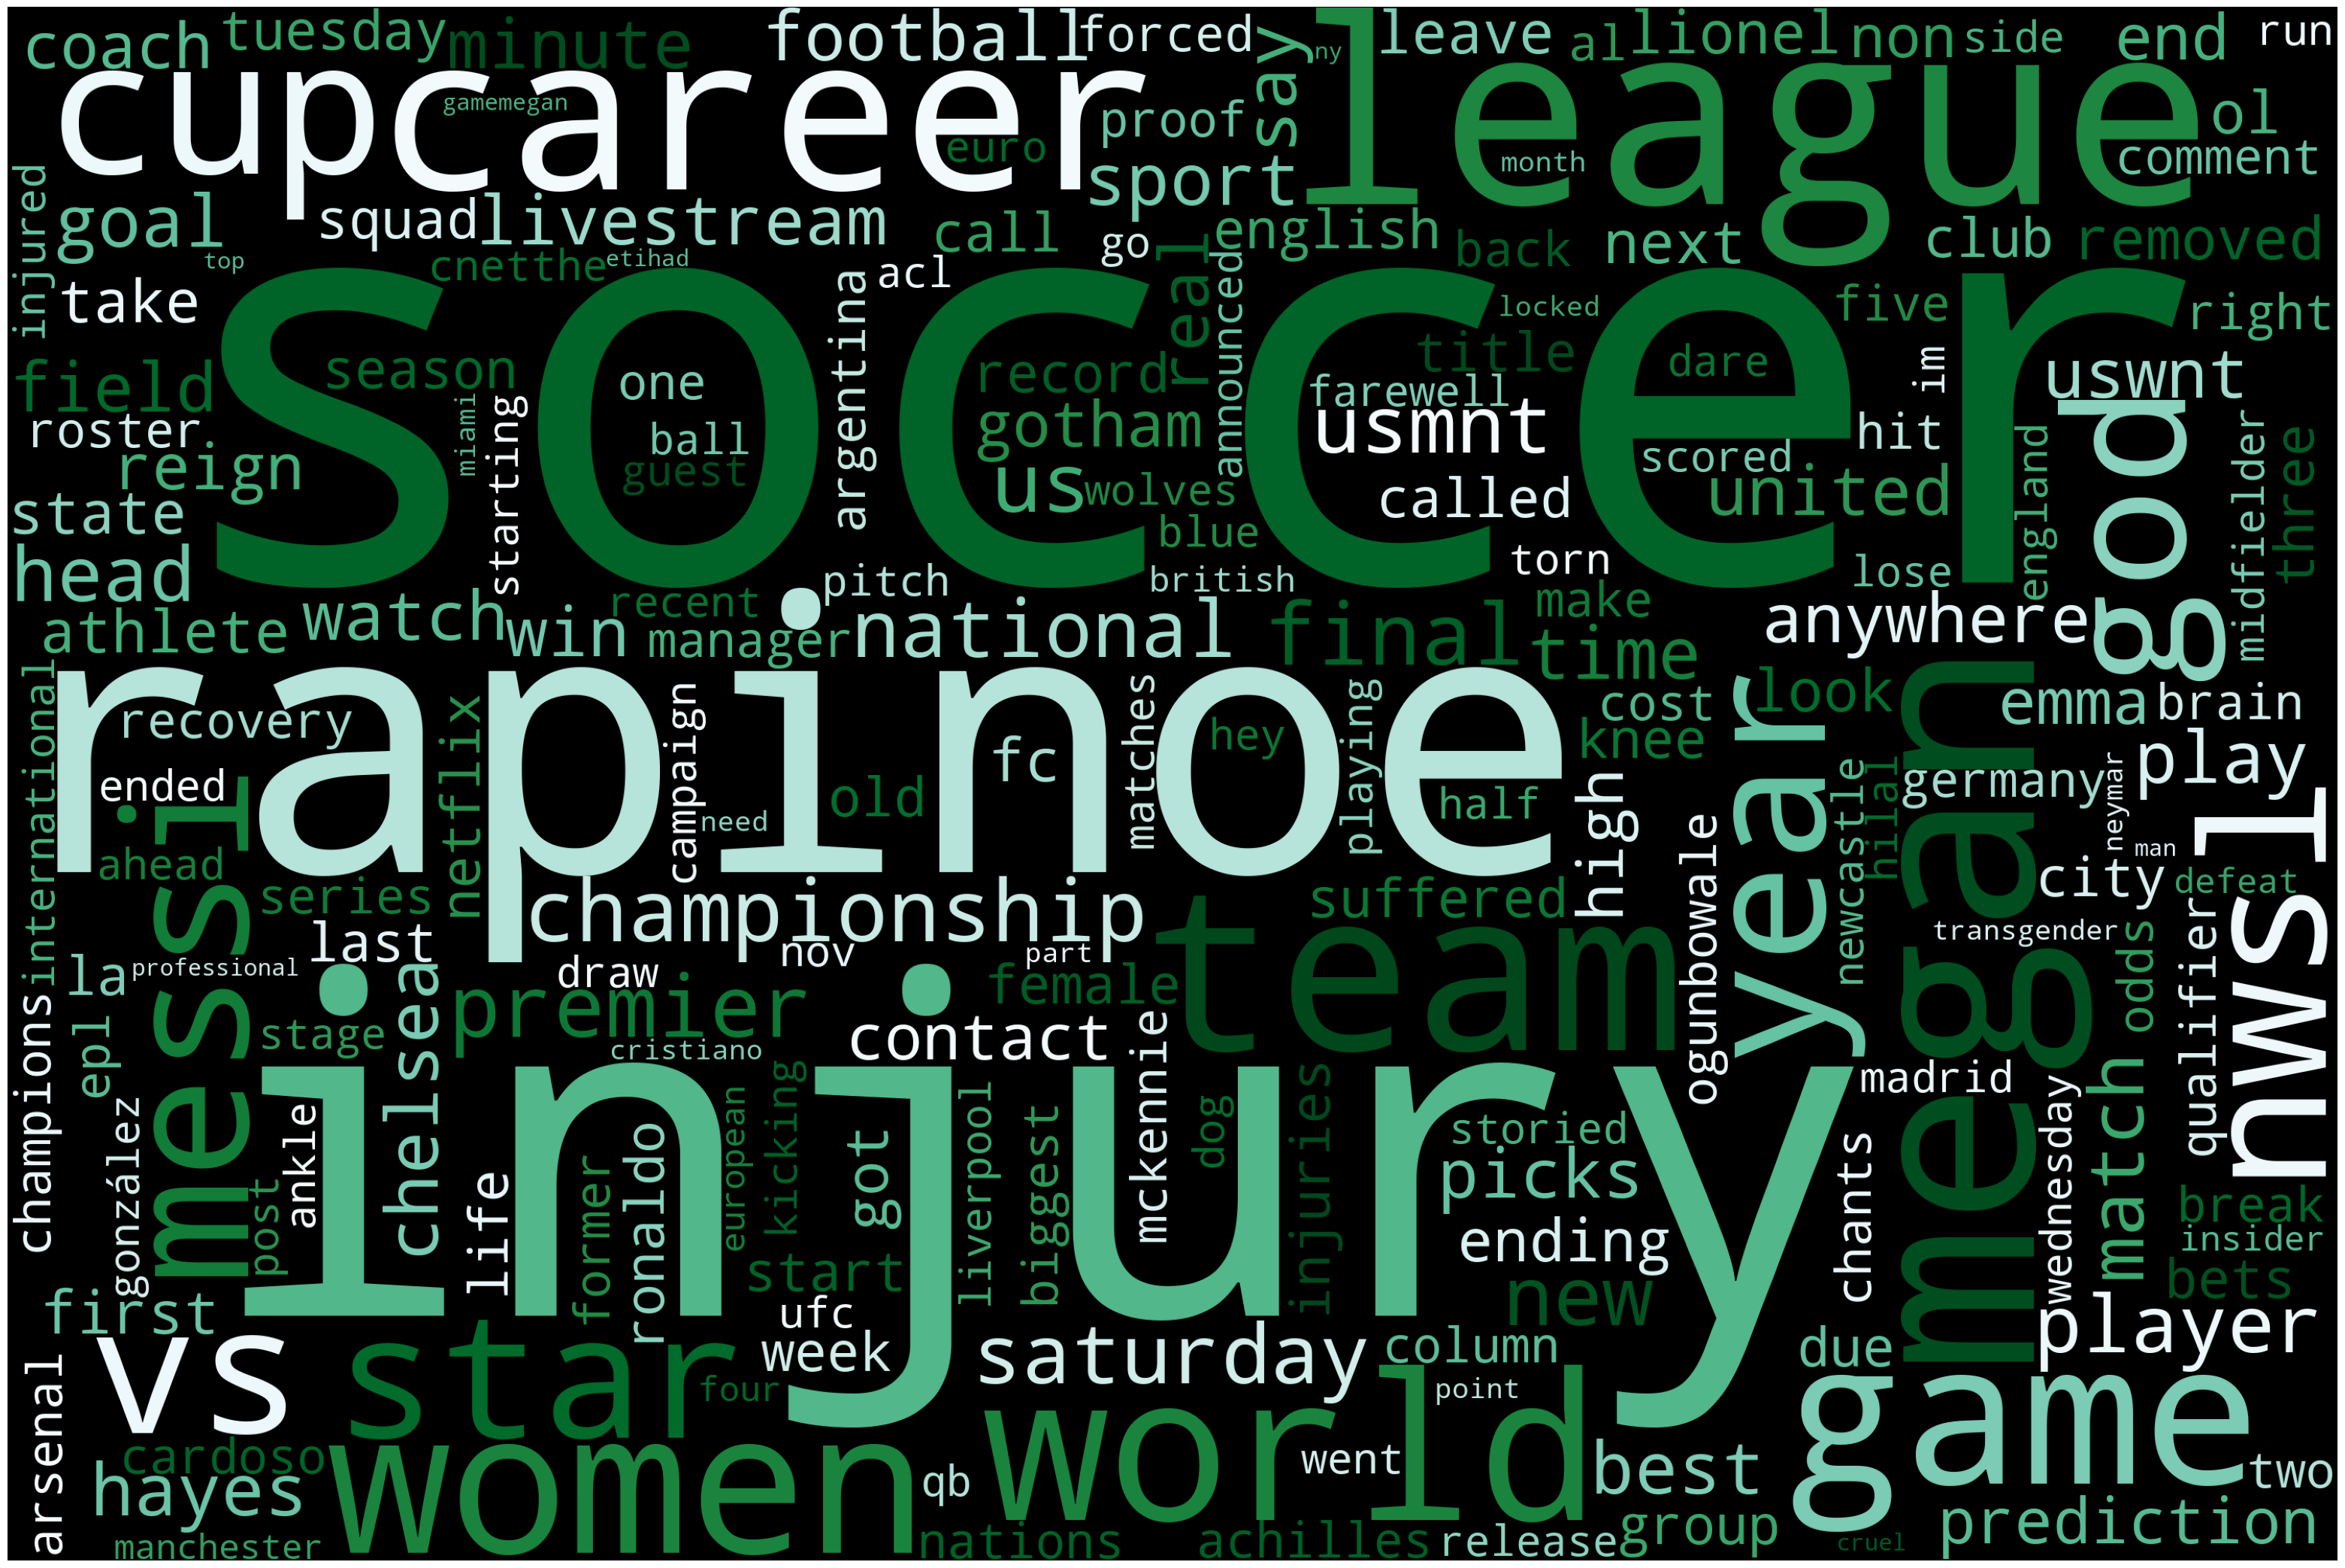

In [27]:
#| code-fold: true
generate_word_cloud(filtered_text)

#### Bar Chart 

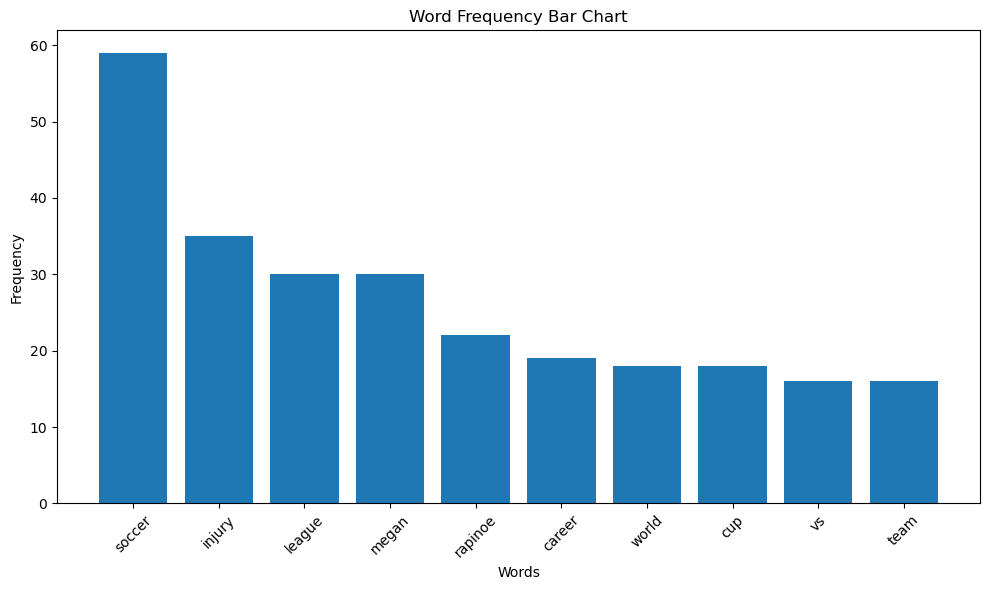

In [31]:
#| code-fold: true
import matplotlib.pyplot as plt
from collections import Counter

words = filtered_text.split()
word_freq = Counter(words)

frequency_threshold = 10

common_words = [(word, freq) for word, freq in word_freq.items() if freq > frequency_threshold]
common_words.sort(key=lambda x: x[1], reverse=True)

words, frequencies = zip(*common_words)

most_common_words = word_freq.most_common(10)  

words, frequencies = zip(*most_common_words)

plt.figure(figsize=(10, 6))
plt.bar(words, frequencies)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Word Frequency Bar Chart')
plt.xticks(rotation=45)  

plt.tight_layout()
plt.show()

The data exploration for this data was successful and revealed that the majority of the topics discussed in the news relating to soccer are about specific players or competitions, and less about injuries. While some information of injuries are present, based on the lack of words that could relate to discussion of injury, other than the word 'injury', it appears that these mentions are surface level. Additionally was pleased to see heavy mention of women's sports! The frequency bar chart showed that the most common word was soccer, followed by injury. Again, the mention is very surface level. It is important to consider the news cycle when we look at this specific set of data. I think the data being focused on Megan Rapinoe could be due to the fact that Megan Rapinoe just tore her achilles in her last game of her career a few weeks ago. While news data is interesting and can be revealing, its reliability and results are very dependent on what API you have access to and what is going on in the world. 

## Hypothesis Refinement 

Based off of the exploratory data analysis process, it became necessary for me to refine my original hypotheses and identify proper next steps. The analysis of all of these different sports was insightful for us to understand what types of injuries are common for athletes, how these injuries commonly occur, and in what conditions they occur in. However, I think a more specific and therefore meaningful way to proceed would be to focus on injury prevention factors and take a deeper look into what methods can help prevent some of the injuries athletes experience. I want to produce an analysis that is going to be able to contribute to a specific converation, and that will only be possible by focusing on one of these data sets, while keeping what I learnt from the other ones in the back of my mind. 